In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
img=image.load_img(r"C:\Users\satya\Desktop\ransom\cnn2\MORE\RGBprocessed_images\train\benign\1.png")

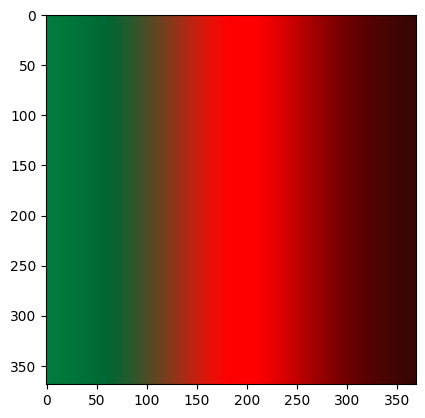

In [3]:
plt.imshow(img)

In [4]:
train=ImageDataGenerator(rescale=1.0/255)
validation=ImageDataGenerator(rescale=1.0/255)
test=ImageDataGenerator(rescale=1.0/255)

In [15]:
train_dataset= train.flow_from_directory('C:/Users/satya/Desktop/ransom/cnn2/MORE/RGBprocessed_images/train/',
                                        target_size=(64,64),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset= validation.flow_from_directory('C:/Users/satya/Desktop/ransom/cnn2/MORE/RGBprocessed_images/val/',
                                        target_size=(64,64),
                                        batch_size=3,
                                        class_mode='binary')
test_dataset= test.flow_from_directory('C:/Users/satya/Desktop/ransom/cnn2/MORE/RGBprocessed_images/test/',
                                        target_size=(64,64),
                                        batch_size=3,
                                       shuffle=False,
                                        class_mode='binary')

Found 2982 images belonging to 2 classes.
Found 856 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [6]:
cv2.imread("C:/Users/satya/Desktop/ransom/cnn2/MORE/RGBprocessed_images/train/benign/1.png").shape

(369, 369, 3)

In [7]:
train_dataset.class_indices

{'benign': 0, 'malicious': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [9]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (64,64,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),

                                    tf.keras.layers.Dense(1,activation='sigmoid'),
]
)
    

C:\Users\satya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [11]:
model_fit = model.fit(train_dataset,
                      # steps_per_epoch = 1,
                      epochs = 10,
                      validation_data=validation_dataset)

C:\Users\satya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.9645 - loss: 0.1353 - val_accuracy: 0.9965 - val_loss: 0.0113
Epoch 2/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9891 - loss: 0.0437 - val_accuracy: 0.9965 - val_loss: 0.0049
Epoch 3/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.9922 - loss: 0.0360 - val_accuracy: 0.9977 - val_loss: 0.0067
Epoch 4/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9947 - loss: 0.0339 - val_accuracy: 0.9988 - val_loss: 0.0040
Epoch 5/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9917 - loss: 0.0387 - val_accuracy: 0.9977 - val_loss: 0.0141
Epoch 6/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.9878 - loss: 0.0400 - val_accuracy: 0.9988 - val_loss: 9.7401e-04
Epoch 7/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9964 - loss: 0.0279 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 8/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9916 - loss: 0.028

In [12]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9967 - loss: 0.0103    
Test Loss: 0.0078
Test Accuracy: 0.9976


In [16]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate the number of steps (batches) in the test dataset and convert to int
test_steps = int(np.ceil(test_dataset.samples / test_dataset.batch_size))

# Get the model predictions on the test dataset
predictions = model.predict(test_dataset, steps=test_steps)

# Since the final layer uses a sigmoid activation, convert probabilities to binary predictions
y_pred = (predictions > 0.5).astype(int).reshape(-1)

# Get the ground truth labels from the test dataset
y_true = test_dataset.classes

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Optionally, display a full classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


  6/141 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

C:\Users\satya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step 
Precision: 0.9956
Recall: 1.0000
F1 Score: 0.9978

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       198
           1       1.00      1.00      1.00       224

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

Confusion Matrix:
[[197   1]
 [  0 224]]
